In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from matplotlib import style

plt.style.available
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
raw_data = pd.read_csv('all_month.csv')
raw_data #inspect data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-24T02:32:24.208Z,60.240700,-151.038500,54.60,1.10,ml,NaN,NaN,NaN,0.52,...,2023-09-24T02:34:28.879Z,"Kenai Peninsula, Alaska",earthquake,NaN,1.600,NaN,NaN,automatic,ak,ak
1,2023-09-24T02:32:04.780Z,38.822334,-122.850998,-0.63,0.65,md,10.0,123.0,0.021710,0.21,...,2023-09-24T02:33:39.590Z,"10 km WNW of The Geysers, CA",earthquake,0.51,2.400,0.340,8.0,automatic,nc,nc
2,2023-09-24T02:25:52.951Z,59.845400,-152.259600,85.80,1.50,ml,NaN,NaN,NaN,0.29,...,2023-09-24T02:28:10.637Z,"25 km WNW of Anchor Point, Alaska",earthquake,NaN,0.500,NaN,NaN,automatic,ak,ak
3,2023-09-24T02:22:34.663Z,58.249700,-155.080200,1.20,1.10,ml,NaN,NaN,NaN,0.32,...,2023-09-24T02:24:37.701Z,"84 km NNW of Karluk, Alaska",earthquake,NaN,1.500,NaN,NaN,automatic,ak,ak
4,2023-09-24T02:07:25.788Z,31.020400,141.875300,10.00,4.50,mb,31.0,136.0,5.928000,0.65,...,2023-09-24T02:26:52.040Z,"Izu Islands, Japan region",earthquake,12.91,1.920,0.127,18.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9657,2023-08-25T02:50:33.508Z,50.814800,-172.055200,10.00,2.90,ml,15.0,246.0,1.940000,0.56,...,2023-09-08T21:22:13.040Z,"214 km SE of Atka, Alaska",earthquake,7.65,2.019,0.115,10.0,reviewed,us,us
9658,2023-08-25T02:50:22.540Z,38.759500,-122.740333,0.96,1.45,md,39.0,71.0,0.007520,0.05,...,2023-08-28T20:59:24.733Z,"2 km SE of The Geysers, CA",earthquake,0.16,0.210,0.174,32.0,reviewed,nc,nc
9659,2023-08-25T02:48:58.180Z,38.773167,-122.736333,1.34,1.59,md,38.0,66.0,0.010060,0.05,...,2023-08-29T19:03:16.276Z,"2 km ESE of The Geysers, CA",earthquake,0.17,0.250,0.130,29.0,reviewed,nc,nc
9660,2023-08-25T02:47:46.690Z,38.757000,-122.736500,1.03,3.00,md,73.0,32.0,0.007593,0.06,...,2023-08-29T21:08:47.040Z,"3 km SE of The Geysers, CA",earthquake,0.09,0.150,0.281,57.0,reviewed,nc,nc


In [3]:
#checking for missing data
raw_data.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2346
gap                2346
dmin               3794
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2971
depthError            1
magError           2379
magNst             2356
status                0
locationSource        0
magSource             0
dtype: int64

In [4]:
#investigating an categorising earthquake depth
raw_data['depth']

#above ground 0
#70-300 shallow 
#300 over deep
depthlist = [] #creating a list to store depth categories
#loop to iterate through data and classify data
for i in range(len(raw_data)):
    val = raw_data['depth'].iloc[i]
    if val <= 0:
       depthlist.append('above ground') 
    elif 0 < val < 300:
        depthlist.append('shallow')  
    else:
        depthlist.append('deep')   
     


raw_data['depthCat'] =  pd.DataFrame(depthlist) #adding new panda to original raw_data for later usage
raw_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,depthCat
0,2023-09-24T02:32:24.208Z,60.240700,-151.038500,54.60,1.10,ml,NaN,NaN,NaN,0.52,...,"Kenai Peninsula, Alaska",earthquake,NaN,1.600,NaN,NaN,automatic,ak,ak,shallow
1,2023-09-24T02:32:04.780Z,38.822334,-122.850998,-0.63,0.65,md,10.0,123.0,0.021710,0.21,...,"10 km WNW of The Geysers, CA",earthquake,0.51,2.400,0.340,8.0,automatic,nc,nc,above ground
2,2023-09-24T02:25:52.951Z,59.845400,-152.259600,85.80,1.50,ml,NaN,NaN,NaN,0.29,...,"25 km WNW of Anchor Point, Alaska",earthquake,NaN,0.500,NaN,NaN,automatic,ak,ak,shallow
3,2023-09-24T02:22:34.663Z,58.249700,-155.080200,1.20,1.10,ml,NaN,NaN,NaN,0.32,...,"84 km NNW of Karluk, Alaska",earthquake,NaN,1.500,NaN,NaN,automatic,ak,ak,shallow
4,2023-09-24T02:07:25.788Z,31.020400,141.875300,10.00,4.50,mb,31.0,136.0,5.928000,0.65,...,"Izu Islands, Japan region",earthquake,12.91,1.920,0.127,18.0,reviewed,us,us,shallow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9657,2023-08-25T02:50:33.508Z,50.814800,-172.055200,10.00,2.90,ml,15.0,246.0,1.940000,0.56,...,"214 km SE of Atka, Alaska",earthquake,7.65,2.019,0.115,10.0,reviewed,us,us,shallow
9658,2023-08-25T02:50:22.540Z,38.759500,-122.740333,0.96,1.45,md,39.0,71.0,0.007520,0.05,...,"2 km SE of The Geysers, CA",earthquake,0.16,0.210,0.174,32.0,reviewed,nc,nc,shallow
9659,2023-08-25T02:48:58.180Z,38.773167,-122.736333,1.34,1.59,md,38.0,66.0,0.010060,0.05,...,"2 km ESE of The Geysers, CA",earthquake,0.17,0.250,0.130,29.0,reviewed,nc,nc,shallow
9660,2023-08-25T02:47:46.690Z,38.757000,-122.736500,1.03,3.00,md,73.0,32.0,0.007593,0.06,...,"3 km SE of The Geysers, CA",earthquake,0.09,0.150,0.281,57.0,reviewed,nc,nc,shallow


Clear there are some hotspots of Earthquake activity. However nothing profound to be drawn from this.

In [5]:
#inspecting the biggest earthquakes
mag_order = raw_data.sort_values('mag', ascending = False)

#finding max value of data without error in mag error
i=0
while True:
    mag_find = mag_order.head(i)
    if mag_find.isnull().sum()['magError'] != 0:
       break 
    i += 1
print(f'Top {len(mag_find)} mags have magerrors')


Top 112 mags have magerrors


Text(0.5, 0, 'Latitude')

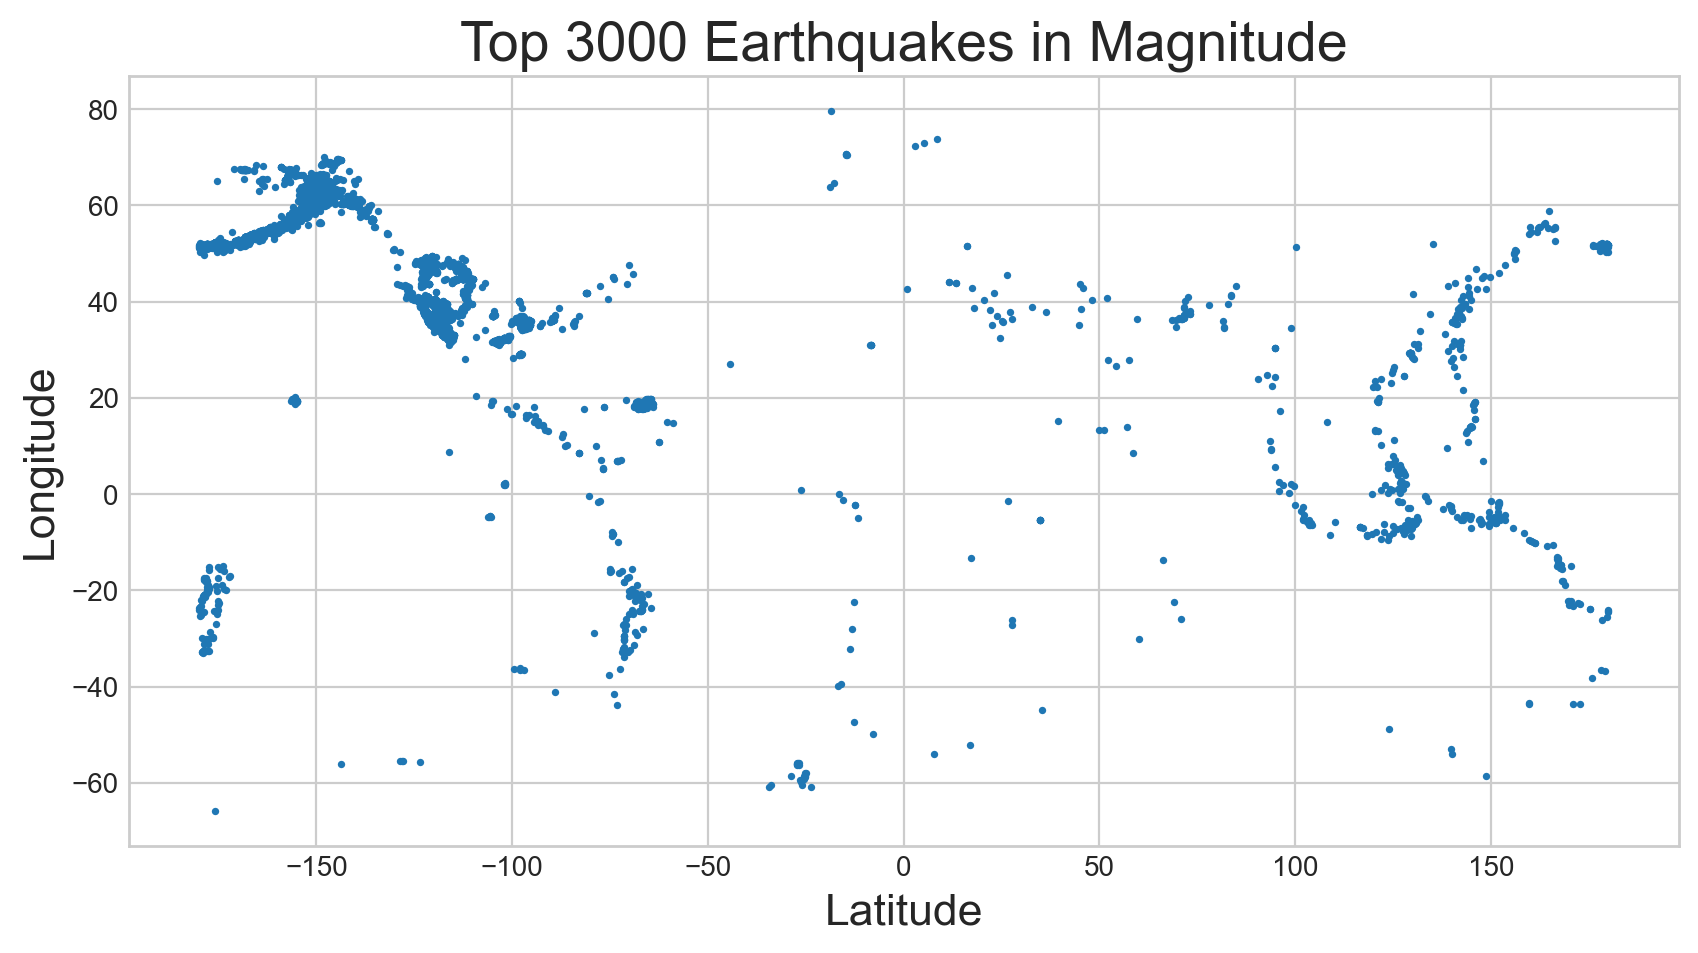

In [39]:
#investigating the relation of latitude and longitude to earthquake 
fig = plt.figure(dpi = 200, figsize=(10,5))
ax = fig.subplots()
scat_mag = mag_order.drop_duplicates(subset = ['latitude'])
scat_mag = mag_order.drop_duplicates(subset = ['longitude'])

scat3d = ax.scatter(scat_mag['longitude'], scat_mag['latitude'], marker = 'o', linewidths = 0, s=7)

plt.title('Top 3000 Earthquakes in Magnitude', fontdict = {'fontname': 'Arial', 'fontsize': 20})
ax.set_ylabel('Longitude', fontdict = {'fontname': 'Arial', 'fontsize': 16})
ax.set_xlabel('Latitude', fontdict= {'fontname': 'Arial', 'fontsize': 16})
#ax.zaxis.labelpad = -4
#ax.set_zlabel('Magnitude', rotation=90, fontdict= {'fontname': 'Arial', 'fontsize': 16})


[Text(0, 0, '178 km NNE of Gili Air, Indonesia'),
 Text(1, 0, 'Al Haouz, Morocco'),
 Text(2, 0, 'south of the Kermadec Islands'),
 Text(3, 0, '180 km N of Hirara, Japan'),
 Text(4, 0, '73 km N of Namuac, Philippines'),
 Text(5, 0, 'Near the coast of Coquimbo, Chile'),
 Text(6, 0, '10 km ENE of Severo-Kuril’sk, Russia'),
 Text(7, 0, '41 km WSW of Sola, Vanuatu'),
 Text(8, 0, 'West Chile Rise'),
 Text(9, 0, 'central East Pacific Rise'),
 Text(10, 0, '101 km N of Palu, Indonesia'),
 Text(11, 0, '39 km NNE of Ternate, Indonesia'),
 Text(12, 0, 'central Mid-Atlantic Ridge'),
 Text(13, 0, 'Banda Sea'),
 Text(14, 0, 'central East Pacific Rise'),
 Text(15, 0, 'Izu Islands, Japan region'),
 Text(16, 0, '3 km NNE of Emiliano Zapata, Mexico'),
 Text(17, 0, 'Prince Edward Islands region'),
 Text(18, 0, 'Kepulauan Babar, Indonesia'),
 Text(19, 0, 'New Guinea, Papua New Guinea')]

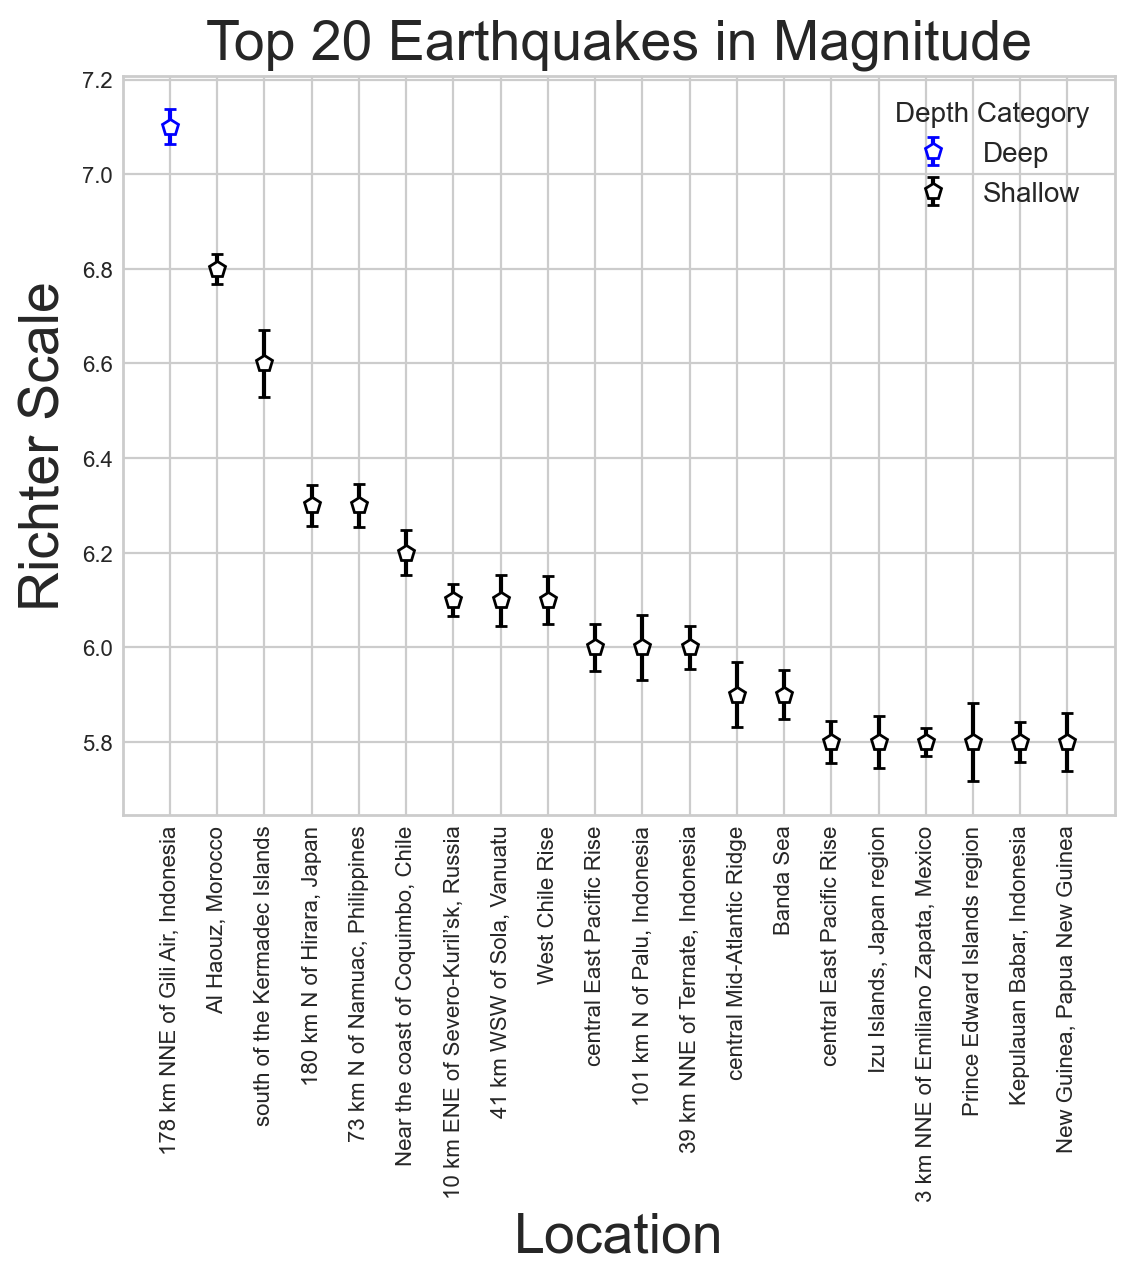

In [7]:
#but we only want the top 50
top_mag = mag_order.head(20)

x = np.arange(len(top_mag))
fig = plt.figure(dpi=200)
ax = fig.subplots()


for i in range(len(top_mag)):
   if top_mag['depthCat'].iloc[i] == 'shallow':
      error1 = ax.errorbar(x[i] , top_mag['mag'].iloc[i], yerr = top_mag['magError'].iloc[i], fmt = 'p', markersize = 6,  markerfacecolor = 'white', markeredgecolor = 'black', \
                           markeredgewidth = 1, snap = True, capsize= 2, ecolor = 'black')
   elif top_mag['depthCat'].iloc[i] == 'deep':  
      error2 = ax.errorbar(x[i] , top_mag['mag'].iloc[i], yerr = top_mag['magError'].iloc[i], fmt = 'p', markersize = 6, markerfacecolor = 'white', markeredgecolor = 'blue', \
                           markeredgewidth = 1, snap = True, capsize= 2, ecolor = 'blue')
 

plt.title(f'Top {len(top_mag)} Earthquakes in Magnitude', fontdict = {'fontname': 'Arial', 'fontsize': 20})                                         
plt.xticks(rotation = 90, fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(['Deep','Shallow'],numpoints = 1, title = 'Depth Category', fontsize = 10)
plt.ylabel('Richter Scale', fontsize = 20)
plt.xlabel('Location', fontsize = 20)
ax.set_xticks(x)
ax.set_xlim(x[0]-1, x[-1]+1)
ax.set_xticklabels(top_mag['place'])

(5.7, 7.2)

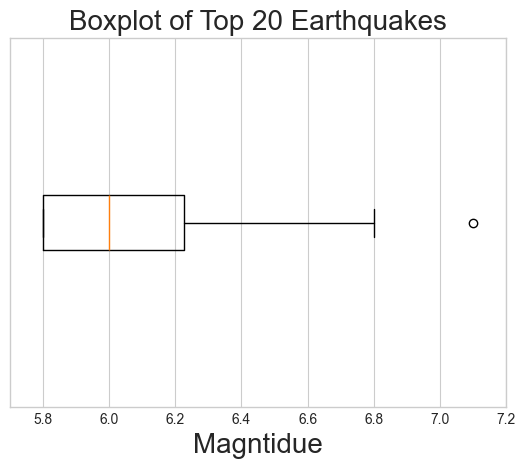

In [35]:
#investigating stats

info_top = top_mag['mag'].describe()
info_top

fig, ax = plt.subplots()

box = ax.boxplot(top_mag['mag'], vert=False)
ax.set_yticks([])
ax.set_xlabel('Magntidue', fontsize = 20)
ax.set_title('Boxplot of Top 20 Earthquakes', fontdict = {'fontname': 'Arial', 'fontsize': 20})
ax.set_xlim([5.7,7.2])

From the graph we can see that apart from the the largest earthquake in Gili Air, almost all the earthquakes of greatest magnitude happen at shallow depths. However, one category of depth, above ground earthquakes, have made it onto the top 20.

/var/folders/d7/c45vs6n11xb04j29p_jkmypw0000gn/T/ipykernel_27978/876509014.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentages.append(round(pie_cats[i]/len(raw_data)*100,1))


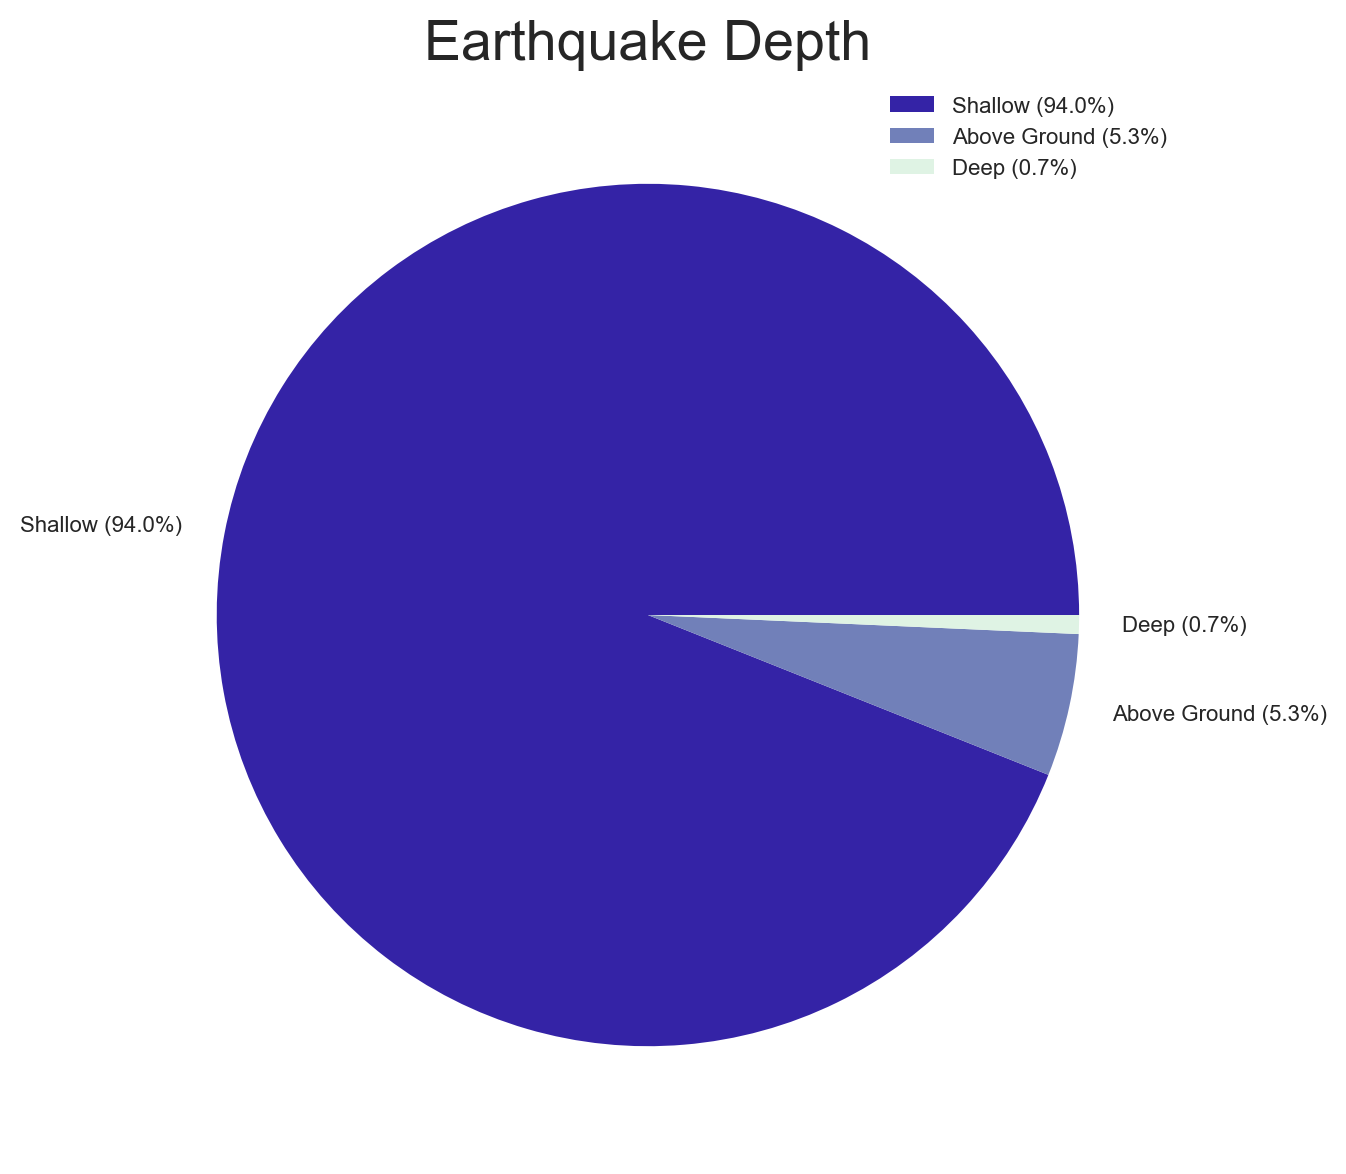

In [9]:
#investigating depths
#find number of differnt categories
pie_cats = raw_data['depthCat'].value_counts()

fig2 = plt.figure(dpi=200, figsize=(7,7))

percentages = []
for i in range(len(pie_cats)):
    percentages.append(round(pie_cats[i]/len(raw_data)*100,1))

labels = [f'Shallow ({percentages[0]}%)', f'Above Ground ({percentages[1]}%)', f'Deep ({percentages[2]}%)']
colors = ['#3423A6', '#7180B9', '#DFF3E4']


plt.pie(pie_cats, labels = labels, colors = colors, wedgeprops = {'linewidth': 0}, textprops = {'fontsize': 8})
plt.title('Earthquake Depth', fontdict = {'fontname': 'Arial', 'fontsize': 20} )
plt.legend(loc = 'upper right', fontsize = 8)

As can be seen the vast majority of earthquakes happen at shallow depths. However a noticebaly proportion of above ground earthquakes have taken place.

In [10]:
#investigating above ground earthquakes
quake_type = raw_data[['mag', 'magError', 'type', 'place']].loc[raw_data['depthCat']=='above ground']
quake_type.groupby('type').count()


,mag,magError,place
type,,,
Landslide,1,0,1
earthquake,294,235,294
explosion,72,48,72
ice quake,30,0,30
other event,1,1,1
quarry blast,118,118,118


Majority of above ground recordings appear to be earthquakes

Text(0, 0.5, 'Frequency')

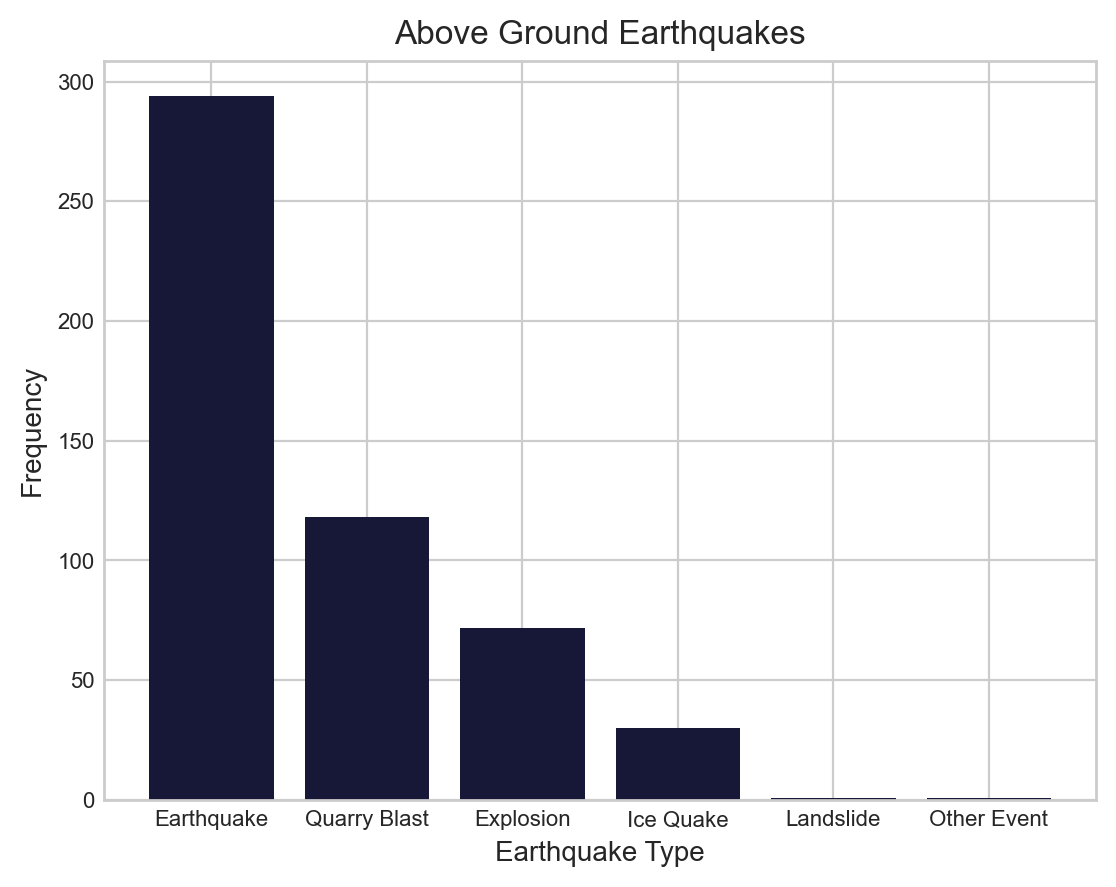

In [11]:
quake_type_count = quake_type['type'].value_counts()

fig = plt.figure(dpi=200)
ax = fig.subplots()

x = np.arange(len(quake_type_count))
quake_bar = ax.bar(x,quake_type_count, color = '#171738', linewidth = 0)

headings = quake_type_count.index

labels1 = [x.title() for x in headings]


plt.xticks(x, fontsize = 8)
plt.yticks(fontsize = 8)
plt.title('Above Ground Earthquakes')
ax.set_xticklabels(labels1)
ax.set_xlabel("Earthquake Type")
ax.set_ylabel("Frequency")

The majority of these above ground earthquakes still come from earthquakes, but let's take a look at the earthquakes that are not earthquakes

       mag  magError          type                                      place
4468  2.60       NaN     explosion                  9 km NNW of Healy, Alaska
510   2.36  0.147446     explosion                3 km S of Princeton, Canada
2040  2.35  0.227000  quarry blast               15 km E of Johnstonville, CA
9524  2.30       NaN     ice quake                79 km WNW of Tyonek, Alaska
2522  2.30       NaN     Landslide  61 km ESE of Denali National Park, Alaska
3429  2.28  0.129907     explosion                   British Columbia, Canada
2885  2.16  0.316755     explosion                   10 km NW of Dover, Idaho
8301  2.10       NaN     ice quake                79 km WNW of Tyonek, Alaska
6048  2.04  0.142769     explosion                7 km S of Princeton, Canada
5298  2.03  0.252108  quarry blast                   4 km E of Butte, Montana
4974  2.01  0.310000  quarry blast            1 km N of Elmore City, Oklahoma
7019  2.01  0.038315     explosion            8 km ENE of Spragu

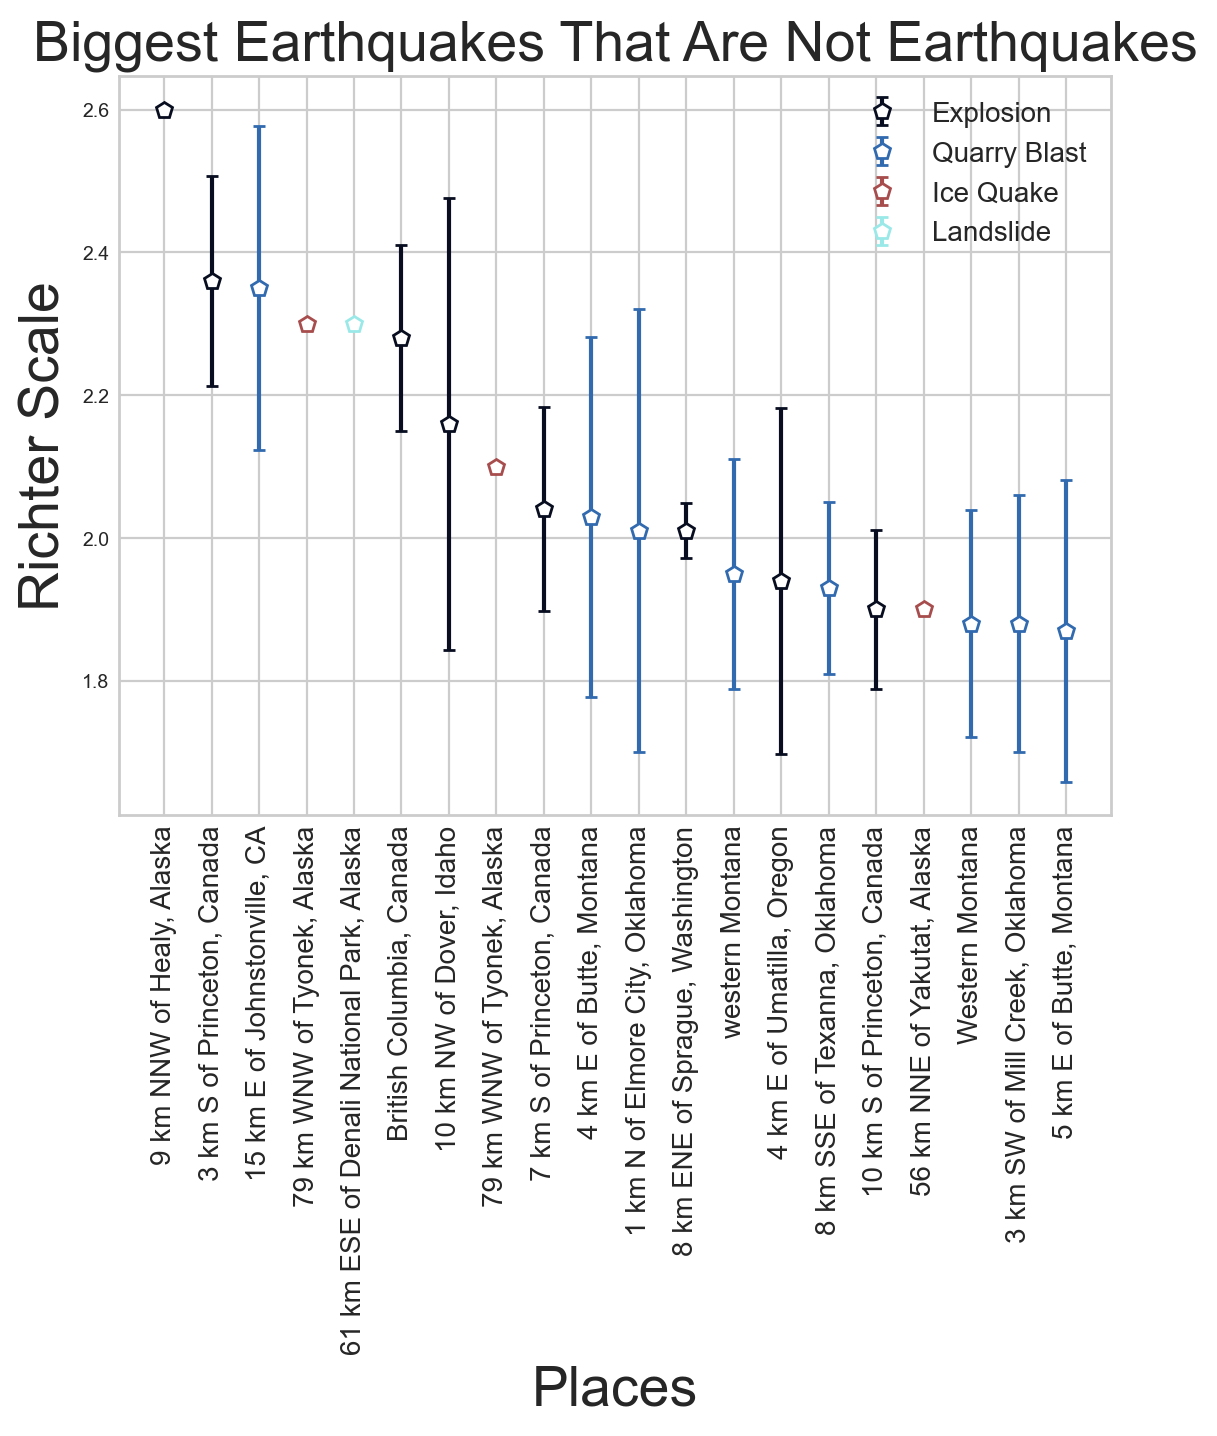

In [12]:
#removing earthquakes
no_quake = quake_type.drop(quake_type[quake_type['type']=='earthquake'].index)
no_quake_top = no_quake.sort_values('mag', ascending=False).head(20)

print(no_quake_top)

fig = plt.figure(dpi=200)
ax = fig.subplots()

x = np.arange(len(no_quake_top))


top_type =  no_quake_top['type']
for i in range(len(top_type)):
    if top_type.iloc[i] == 'explosion':
        error1 = ax.errorbar(x[i], no_quake_top['mag'].iloc[i], yerr = no_quake_top['magError'].iloc[i], fmt = 'p', markersize = 6,  markerfacecolor = 'white', markeredgecolor = '#080E20', \
            markeredgewidth = 1, snap = True, capsize= 2, ecolor = '#080E20', label = 'Explosion' )
    elif top_type.iloc[i] == 'quarry blast':
        error2 = ax.errorbar(x[i], no_quake_top['mag'].iloc[i], yerr = no_quake_top['magError'].iloc[i], fmt = 'p', markersize = 6,  markerfacecolor = 'white', markeredgecolor = '#316AAF', \
            markeredgewidth = 1, snap = True, capsize= 2, ecolor = '#316AAF', label = 'Quarry Blast' ) 
    elif top_type.iloc[i] == 'Landslide':
        error3 = ax.errorbar(x[i], no_quake_top['mag'].iloc[i], yerr = no_quake_top['magError'].iloc[i], fmt = 'p', markersize = 6,  markerfacecolor = 'white', markeredgecolor = '#9AE9E8', \
            markeredgewidth = 1, snap = True, capsize= 2, ecolor = '#9AE9E8', label = 'Landslide' )
    elif top_type.iloc[i] == 'ice quake':
        error4 = ax.errorbar(x[i], no_quake_top['mag'].iloc[i], yerr = no_quake_top['magError'].iloc[i], fmt = 'p', markersize = 6,  markerfacecolor = 'white', markeredgecolor = '#A84D4D', \
            markeredgewidth = 1, snap = True, capsize= 2, ecolor = '#A84D4D', label = 'Ice Quake' )  


plt.title('Biggest Earthquakes That Are Not Earthquakes', fontdict = {'fontname': 'Arial', 'fontsize': 20})    
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 7)
ax.set_xticks(x)
ax.set_xticklabels(no_quake_top['place'])
ax.set_xlabel('Places', fontsize = 20)
ax.set_ylabel('Richter Scale', fontsize = 20)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
